# 확률론

## 알아야 할 내용
- 확률분포가 가지는 의미??
- 조건부 확률
- 기대값
- 몬테카를로 샘플링
- 이산확률변수와 연속 확률변수의 차이점 알아야함
- 통계학으로 연계를 생각하면서 공부하기
- 추가공부
    - 몬테카를로 방법을 활용하여 원주율에 대한 근사값을 어떻게 구할 수 있을까요?

- 딥러닝에서 왜 학률론이 필요한가?
    - 확률론 기반의 기계학습 이론
    - 확률론으로 회귀분석, 분류분석을 해석함
        - 회귀분석 L2 노름은 예측오차의 분산을 가장 최소화 하는 방향으로 학습
        - 분류분석 교차엔트로피는 모델 예측의 불확실성을 최소화 하는 방향으로 학습
    분산 및 불확실성을 최소화 하는 방법을 측정하는것을 이해하기위해서는 확률론 이해 필요

- 확률 분포는 데이터에서 어떤 의미??
    - 초상화를 의미함
    - 파란색 점이 데이터 공간상에서 관측한 데이터
        - 데이터를 추출할때 확률 변수를 사용하고 이 분포를 D라고 한다.

### 이산확률 변수 vs 연속확률변수
- 이산형과 연속형으로 확률 변수를 구분함
    - 데이터 공간으로 구분하는 것이아니라 확률 분포에 따라서 구분한다
- 이상형의 경우 모델링?
    - 확률변수가 가질 수 있는 경우의 수를 모두 고려하여 확률을 더해서 모델링함

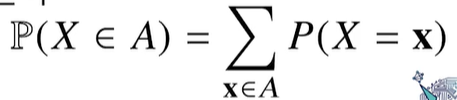

- 연속형 확률 변수 보델링?
    - 데이터 공간에 정의된 확률 변수의 밀도의 적분을 통해 모델링

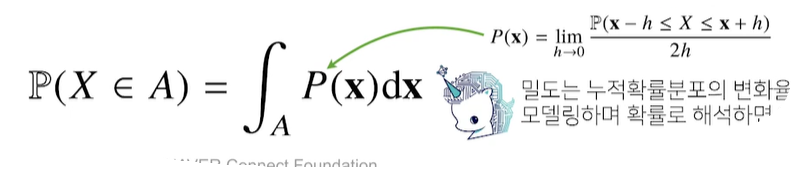

- 이산형도 연속형도 아닌경우도 있긴함 (두개가 섞여있는 경우도 있음)

- 원래 데이터가 이산형, 연속형 이더라고, 어떤식으로 접근하는지에 따라서 데이터의 분포가 달라진다
    - 아래 그림에서 파란색 점은 이산형이지만, 빨간색 칸으로 나눠서 숫자를 세면 이산형이 된다.

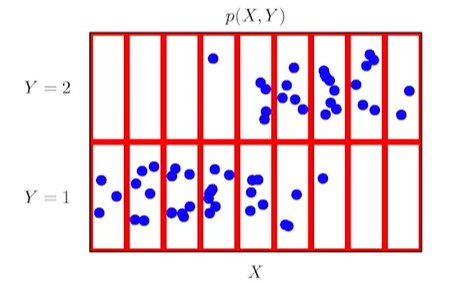

- 주변확률 분포??
    - x의 입력만 고려해서 분포를 나타내어줌
    - y는 고려하지 않음 (아래 그림처럼 y=1, y=2인 것에 따라서 분포에 영향을 안줌)
    - x의 갯수만 고려해서 보여주는 듯
    - 단, y에 대한 주변확률 분포를 구할때도 있음

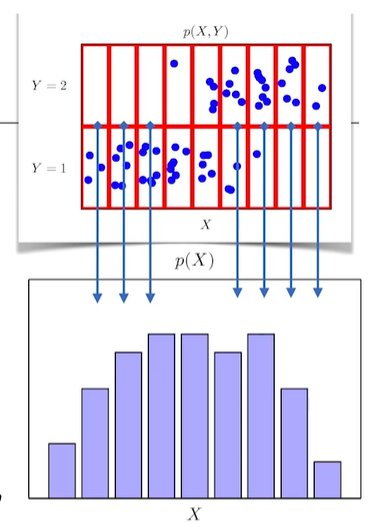

- 조건부 확률 분포?
    - 2가지 종류, y가 주어진 상태에서 나누어 구함
    - 아래 예시에서보면 y=1 인경우만 count해서 확률 분포를 나태내는 것이 하나의 예시임
    - 통계적 관점을 모델링할 때 사용 가능

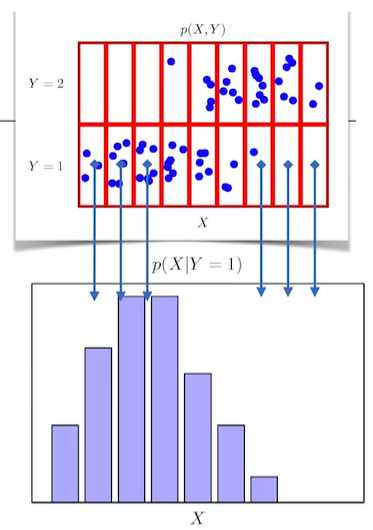

- 조건부확률과 기계학습?
    - 로지스틱 회귀에서 사용한 선형모델과 softmax 함수의 결합은 데이터에서 추출된 패턴을 기반으로 확률 해석을 하는데 사용됨
    - 조건부 기대값을 항상 사용하는 건 아니고, 기계학습 문제의 원하는 목적에 따라서 다른 예측 통계량을 사용할 수 잇음
        - 관찰하는 데이터가 로버스트 하게 예측하려면 조건부 기대값이 아닌 median을 주로 사용
            - 로버스트하다, 강직하다의 의미는 데이터 outlier에 큰 영향을 안받게 설계했다는 의미
        - 통계적 모형에서 원하는 목적에 따라서 추정 값이 달라질 수 있음

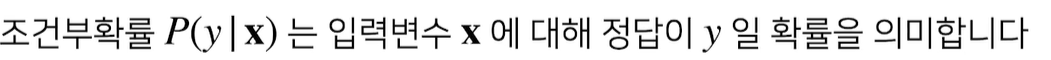

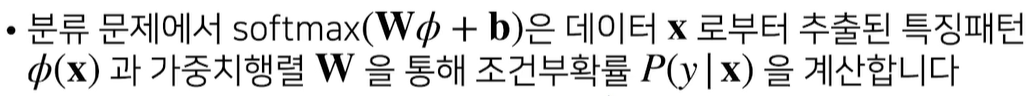

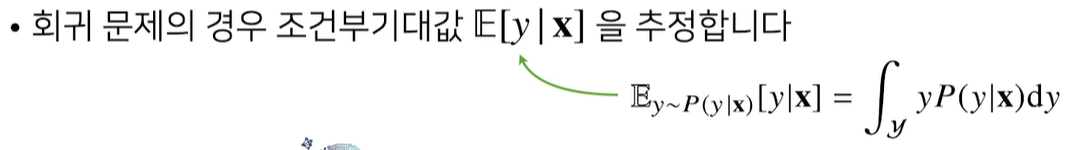

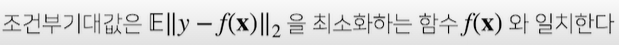

### 기대값이 무엇이냐??
- 기대값은 데이터를 대표하는 통계량
- 동시에 기대값은 확률 분포를 통해 다른 통계적 범함수를 계산하는데 사용함
- 평균, mean이랑 동일한 개념으로 사용할 수 있지만, 기계학습에선 더 넓은 의미
- 분산, 첨도, 공분산 등 통계량을 계산할 수 있음
    - 여기서 공분산은 두 확률변수의 상관정도를 나타내는 척도로 +는 양의상관관계 - 는 음의 상관관계에 있다고 할 수 있음
    - 첨도는 확률 분포의 뾰족한 정도를 의미함 ( Skewness 아래 그림 참조)
- 기계학습의 경우
    - 다층신경망을 사용해서 데이터로 부터 특징 패턴을 추출해서 함
        - 손실함수를 어떻게 사용할지는 잠시후에 소개

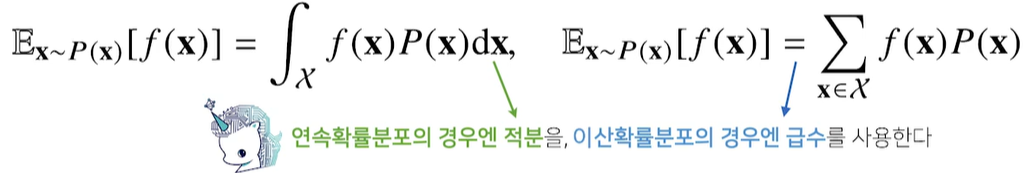

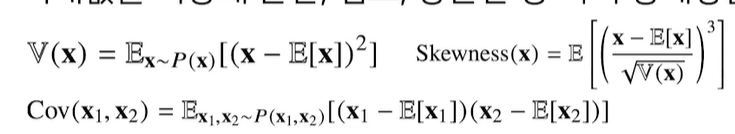

## 몬테카를로 샘플링???
- 기계학습은 확률분포를 모를때가 많음 이럴때 사용하는 것
- 샘플링을 통해서 기대값을 대신 계산할 수 있음
- 단 독립적으로 샘플링을 해서 구해야함
- 샘플링만 가능하면, 기대값을 계산할 수 있으니깐 정말 많이 사용됨
- 대수의 법칙에 의해 수렴성을 보장함
- 단, 샘플링 갯수가 적으면 정확하지 않을 수 있음

- 몬테카를로 예제

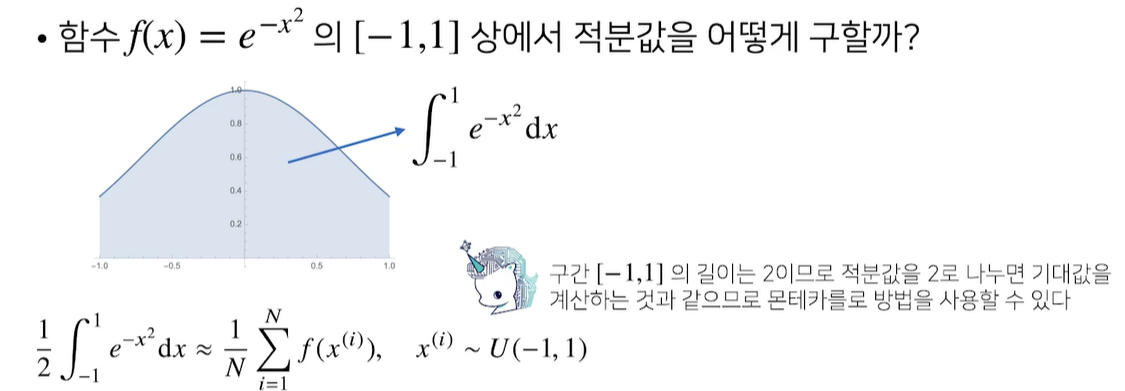

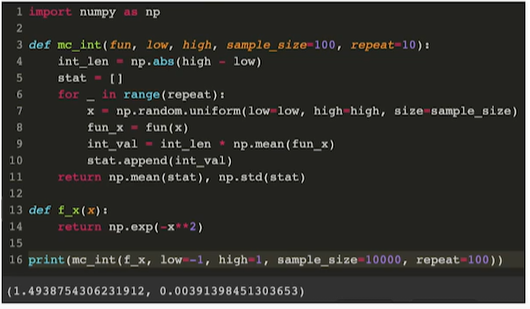

In [2]:
import numpy as np
np.mean(np.arange(1,7))

3.5

In [7]:
def mc_int(fun, low, high, sample_size=100, repeat=10):
    int_len = np.abs(high - low)
    stat = []
    for _ in range(repeat):
        x = np.random.uniform(low=low, high=high, size=sample_size)
        fun_x = fun(x)
        int_val = int_len + np.mean(fun_x)
        stat.append(int_val)
    return np.mean(stat), np.std(stat)

def f_x(x):
    return np.exp(-x**2)

print(mc_int(f_x, low=-1, high = 1, sample_size=10000, repeat=100))

(2.74665865006704, 0.002146616290503655)


In [12]:
1/6*((3.5-1)**2+(3.5-3)**2+(3.5-5)**2)

1.4583333333333333

In [9]:
np.mean(np.arange(1,6,2))

3.0

In [13]:
answer = 0 
for i in range(1,7):
    answer += 1/6*(3.5-i)**2
answer

2.9166666666666665